In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('MARUTI.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4468,2021-06-25,MARUTI,EQ,7527.45,7540.0,7665.0,7540.00,7623.00,7649.00,7627.10,1216123,9.275493e+14,114428.0,707447.0,0.5817
4469,2021-06-28,MARUTI,EQ,7649.00,7698.0,7698.0,7571.40,7596.00,7596.25,7608.92,433364,3.297432e+14,50498.0,163967.0,0.3784
4470,2021-06-29,MARUTI,EQ,7596.25,7596.0,7601.0,7452.55,7503.00,7487.50,7502.99,480219,3.603079e+14,52711.0,205273.0,0.4275
4471,2021-06-30,MARUTI,EQ,7487.50,7505.5,7646.6,7492.60,7539.90,7515.90,7557.97,729267,5.511776e+14,94722.0,332638.0,0.4561
4472,2021-07-01,MARUTI,EQ,7515.90,7500.0,7605.0,7495.05,7584.55,7584.40,7563.96,584331,4.419858e+14,57959.0,255187.0,0.4367


In [5]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [6]:
df1=df.reset_index()['Close']
df1

0        164.30
1        167.00
2        173.35
3        177.95
4        176.20
         ...   
4468    7649.00
4469    7596.25
4470    7487.50
4471    7515.90
4472    7584.40
Name: Close, Length: 4473, dtype: float64

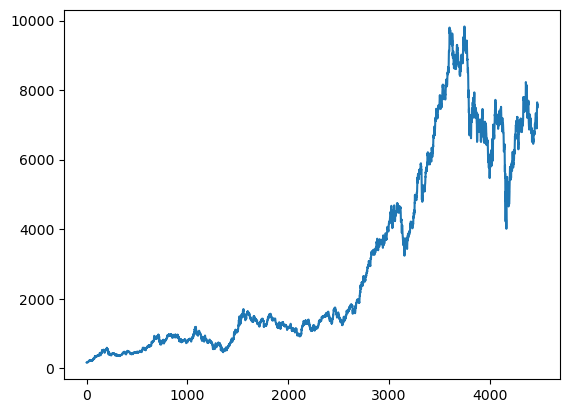

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

0        164.30
1        167.00
2        173.35
3        177.95
4        176.20
         ...   
4468    7649.00
4469    7596.25
4470    7487.50
4471    7515.90
4472    7584.40
Name: Close, Length: 4473, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.00000000e+00]
 [2.79267492e-04]
 [9.36063259e-04]
 ...
 [7.57456183e-01]
 [7.60393664e-01]
 [7.67478783e-01]]


In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(2907, 1566)

In [14]:
train_data

array([[0.00000000e+00],
       [2.79267492e-04],
       [9.36063259e-04],
       ...,
       [3.57519277e-01],
       [3.66890253e-01],
       [3.66600642e-01]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(2806, 100)
(2806,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(1465, 100)
(1465,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
44/44 [==============================] - 354s 5s/step - loss: 0.0012 - val_loss: 0.0022
Epoch 2/100
44/44 [==============================] - 152s 3s/step - loss: 6.5690e-05 - val_loss: 0.0022
Epoch 3/100
44/44 [==============================] - 141s 3s/step - loss: 5.5794e-05 - val_loss: 0.0013
Epoch 4/100
44/44 [==============================] - 136s 3s/step - loss: 5.3894e-05 - val_loss: 0.0015
Epoch 5/100
44/44 [==============================] - 141s 3s/step - loss: 5.1647e-05 - val_loss: 0.0013
Epoch 6/100
44/44 [==============================] - 133s 3s/step - loss: 5.4568e-05 - val_loss: 0.0011
Epoch 7/100
44/44 [==============================] - 141s 3s/step - loss: 5.1874e-05 - val_loss: 0.0010
Epoch 8/100
44/44 [==============================] - 138s 3s/step - loss: 5.4133e-05 - val_loss: 0.0010
Epoch 9/100
44/44 [==============================] - 133s 3s/step - loss: 4.6592e-05 - val_loss: 9.7704e-04
Epoch 10/100
44/44 [==============================] - 124s 3s/st

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.14.0'

In [27]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

46/46 [==============================] - 24s 497ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1321.4170483684795

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))

6690.559203676417

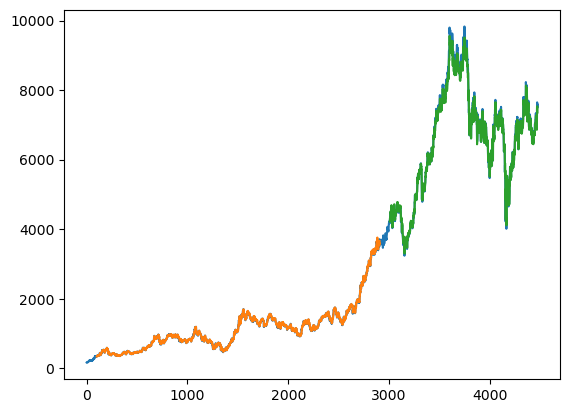

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

1566

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1225)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.43952565899370605,
 0.439629091398044,
 0.45368038352735524,
 0.4454833654835723,
 0.4544664698003236,
 0.47570631403112273,
 0.47509606284552885,
 0.4863339935768476,
 0.4987251956165346,
 0.4871200798498161,
 0.4887543118383557,
 0.4941327968639294,
 0.499314760321261,
 0.49611869902721817,
 0.48585303289667614,
 0.4876165553906382,
 0.48968003185718045,
 0.4861219571479548,
 0.48877499831922344,
 0.49146424083201024,
 0.48983518046368746,
 0.48338617005321594,
 0.482977612056081,
 0.49484648045386137,
 0.49331050924944264,
 0.4919865744739168,
 0.49265888510211353,
 0.5071652798105117,
 0.5057172261497803,
 0.5064515962205799,
 0.516763806933074,
 0.5332354173238933,
 0.5349265371348189,
 0.5507878963400442,
 0.541851336605245,
 0.5341973386842364,
 0.5378071295956309,
 0.5469608973795399,
 0.5594658750639987,
 0.5510464773508892,
 0.5534202510304453,
 0.552013570331449,
 0.561927566287242,
 0.5624136985876305,
 0.5590107724849117,
 0.5530634092354793,
 0.554139106240594,
 0.5455

In [44]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=1224
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        print()
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.4941328  0.49931476 0.4961187  ... 0.71444631 0.70971626 0.70500284]
0 day output [[0.7004033]]

1 day input [0.49931476 0.4961187  0.48585303 ... 0.70971626 0.70500284 0.70040327]
1 day output [[0.6960611]]

2 day input [0.4961187  0.48585303 0.48761656 ... 0.70500284 0.70040327 0.69606107]
2 day output [[0.6921057]]

3 day input [0.48585303 0.48761656 0.48968003 ... 0.70040327 0.69606107 0.69210571]
3 day output [[0.68861496]]

4 day input [0.48761656 0.48968003 0.48612196 ... 0.69606107 0.69210571 0.68861496]
4 day output [[0.6856057]]

5 day input [0.48968003 0.48612196 0.488775   ... 0.69210571 0.68861496 0.6856057 ]
5 day output [[0.6830466]]

6 day input [0.48612196 0.488775   0.49146424 ... 0.68861496 0.6856057  0.68304658]
6 day output [[0.6808779]]

7 day input [0.488775   0.49146424 0.48983518 ... 0.6856057  0.68304658 0.68087792]
7 day output [[0.67903143]]

8 day input [0.49146424 0.48983518 0.48338617 ... 0.68304658 0.68087792 0.67903143]
8 day output [[0.6

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

4473

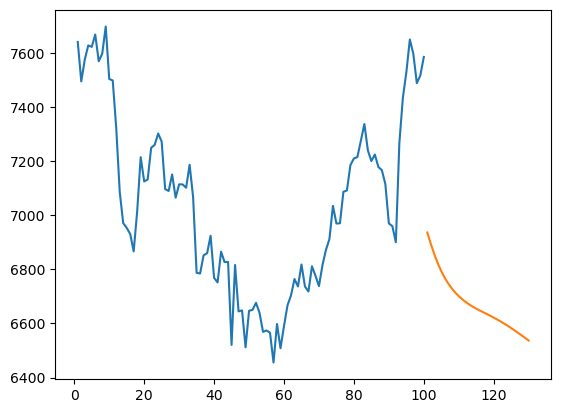

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[4373:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [60]:
import pandas as pd

length_of_df3 = len(df3)
print(length_of_df3)

5


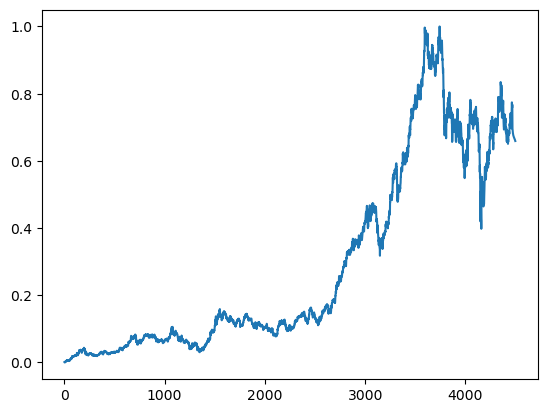

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5:])

In [62]:
df3=scaler.inverse_transform(df3).tolist()

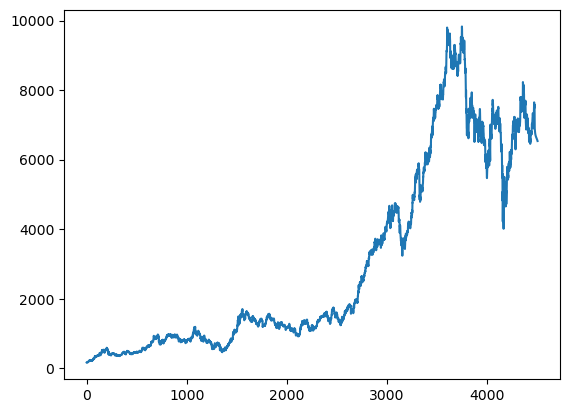

In [64]:
plt.plot(df3)